In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')
submission = pd.read_csv('./titanic/gender_submission.csv')

In [3]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use('ggplot')

In [7]:
train_df[['Age', 'Cabin', 'Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [8]:
train_df[['Age', 'Cabin', 'Embarked']].dropna()

,Age,Cabin,Embarked
1,38.0,C85,C
3,35.0,C123,S
6,54.0,E46,S
10,4.0,G6,S
11,58.0,C103,S
...,...,...,...
871,47.0,D35,S
872,33.0,B51 B53 B55,S
879,56.0,C50,C
887,19.0,B42,S


In [9]:
train_df[['Survived', 'PassengerId', 'Embarked']].dropna().groupby(['Embarked', 'Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [10]:
train_df[['Pclass', 'PassengerId', 'Survived']].groupby(['Pclass', 'Survived']).count()

PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119

<AxesSubplot:xlabel='Embarked'>

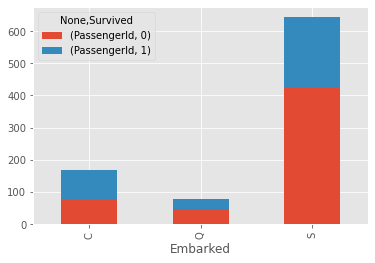

In [11]:
embarked_df = train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()
embarked_df.plot.bar(stacked=True)

In [15]:
train_corr = train_df.corr()

<AxesSubplot:>

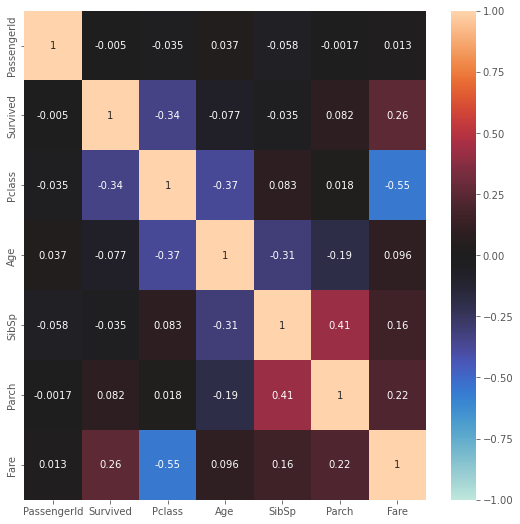

In [16]:
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

In [18]:
pd.get_dummies(train_df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1
